Build a model based on the data you have scraped. Don't worry if the model is far from perfect. You can always improve later. The most important thing is your story, you can answer the following questions after you finish modeling.

1. Why this project is important? What problem are you trying to solve?

>- We would like to predict whether a provider is potentially fraudulent based on inpatient and outpatient claims data. In addition, we will also discuss which features are important in detecting the behavior of poterntially fraud providers.
>- Provider Fraud is one of the biggest problems that healthcare is facing currently. Fraud costs the U.S. about $60 billion annually and accounts for up to 10 percent of total healthcare spending. If we are able to identify which providers are more likely to have fraud behavior, we can prevent the financial loss and protect the healthcare system so that they can provide quality and safe care to patien

2. How do you measure the model performance (metrics)? What is the benchmark?

Let's assume there are $3$ billion dollars from False Claims cases in the 2021 fiscal year, with $2.6$ billion dollars coming from healthcare fraud schemes, if we can identify 70% of these potential healthcare fraud providers, we can save $1.82$ billion dollars for this year.

3. How is your model? Have achieved your goal? How to evaluate the business value of your model?

We will use metrics such as precision, ROC(Receiver Operating Characteristics), AUC score (Area Under ROC Curve).


4. Any insights have you gotten from your model? Any actionable suggestions can you provide to your business partner?

We found the most important features that affect the providers' fraud behaviorm as follows: hospital days, claim counts, claim amount reimbursed,  outpatient annual deductible amount, outpatient annual reimburse amount and dedutible amount paid.

5. What is the most challenging part in the project? How did you solve it? How will you futher improve your model if you get more resources and time.

>- How to balance between recall vs precision? High precision may be also desirable since initiation of an investigation could be costly. We discussed this question with teachers and decide use precision.
>- We are not sure if the fraud provider's all claims are fraud or not, so we will consider both cases and compare the results between the two cases.
>- Our data are imbalanced, so we will take downsampling and SMOTE to handle this problem.

Make sure that your work includes these parts:
1. **Pre-model Analysis**: process and visualize data; get insights of features and target.
2. **Problem Definition**: translate the business needs into machine learning problems; design metrics to measure model performance.
3. **Feature Engineering**: create features which might improve model performance.
4. **Modeling**: Model selection, feature elimination, validation, hyperparameter tuning.
5. **Post-model Analysis**: Model performance, feature importance, actionable suggestions to business.

In [1]:
# Import libraries

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Import Original Data
Healthcare_Inpatient_raw  = pd.read_csv('/Users/cuicuisong/Desktop/data/Raw/inpatient.csv')
Healthcare_Outpatient_raw = pd.read_csv('/Users/cuicuisong/Desktop/data/Raw/outpatient.csv')
Healthcare_Beneficiary_raw = pd.read_csv('/Users/cuicuisong/Desktop/data/Raw/beneficiary.csv')
Healthcare_Provider_raw  = pd.read_csv('/Users/cuicuisong/Desktop/data/Raw/provider.csv')

In [9]:
# dataset shapes
print('Shape of inpatient data :',Healthcare_Inpatient_raw.shape)
print('Shape of outpatient data :',Healthcare_Outpatient_raw.shape)
print('Shape of beneficiary data :',Healthcare_Beneficiary_raw.shape)
print('Shape of provider data :',Healthcare_Provider_raw  .shape)

Shape of inpatient data : (40474, 30)
Shape of outpatient data : (517737, 27)
Shape of beneficiary data : (138556, 25)
Shape of provider data : (5410, 2)


In [10]:
Healthcare_Inpatient_raw.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [11]:
Healthcare_Outpatient_raw.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [12]:
Healthcare_Beneficiary_raw.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [13]:
Healthcare_Provider_raw.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [19]:
# check duplicates
print(Healthcare_Beneficiary_raw.duplicated().sum())
print(Healthcare_Inpatient_raw.duplicated().sum())
print(Healthcare_Outpatient_raw.duplicated().sum())
print(Healthcare_Provider_raw.duplicated().sum())


0
0
0
0


In [21]:
print(Healthcare_Beneficiary_raw.isna().sum())
print(Healthcare_Inpatient_raw.isna().sum())
print(Healthcare_Outpatient_raw.isna().sum())
print(Healthcare_Provider_raw.isna().sum())


BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

<AxesSubplot:>

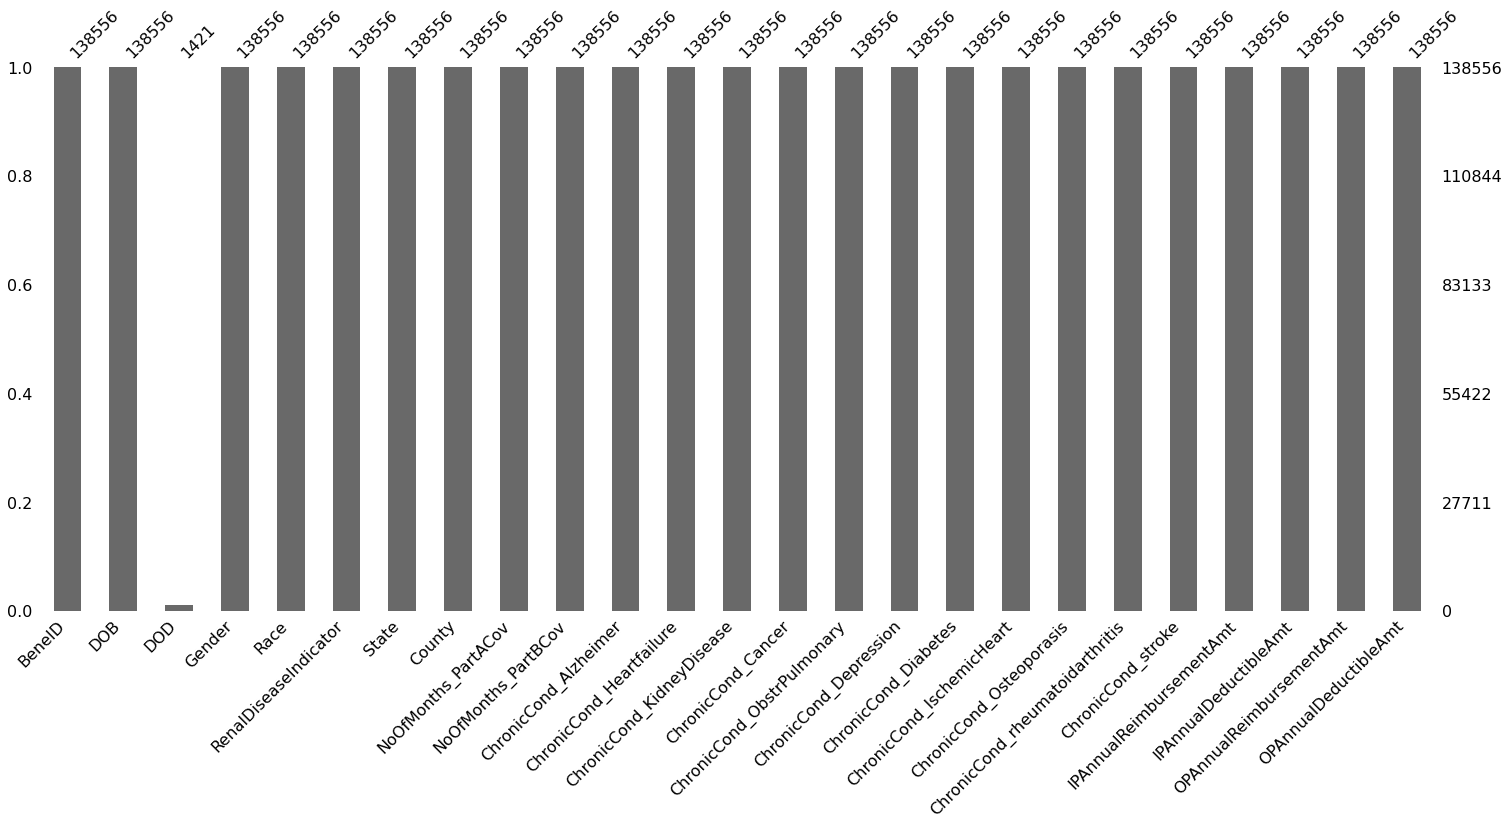

In [15]:
# check missing values
import missingno as msno
msno.bar(Healthcare_Beneficiary_raw)

In [22]:
msno.bar(Healthcare_Inpatient_raw)

In [ ]:
msno.bar(Healthcare_Outpatient_raw)

In [18]:
# check the unique value of providers in each dataframe
len(Healthcare_Outpatient_raw['Provider'].unique()), \
len(Healthcare_Inpatient_raw['Provider'].unique()), \
len(Healthcare_Provider_raw['Provider'].unique())

(5012, 2092, 5410)

In [14]:
# number of Fraudulent and Non-Fraudulent provider

print(Healthcare_Provider_raw['PotentialFraud'].value_counts())
print("*" * 40)
print(Healthcare_Provider_raw['PotentialFraud'].value_counts(normalize=True))


No     4904
Yes     506
Name: PotentialFraud, dtype: int64
****************************************
No     0.90647
Yes    0.09353
Name: PotentialFraud, dtype: float64


### Merge Data

In [23]:
# Merge the inpatient and outpatient data
concat_df=pd.concat([Healthcare_Inpatient_raw,Healthcare_Outpatient_raw],axis=0)
concat_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [24]:
# merge the beneficiary data
merge_bene_df=concat_df.merge(Healthcare_Beneficiary_raw, on='BeneID', how='left')
merge_bene_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,1,2,1,1,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,1,2,1,2,2,2,21260,2136,120,100


In [25]:
# merge provider data
merge_provider_df=merge_bene_df.merge(Healthcare_Provider_raw, on = 'Provider', how ='left')
merge_provider_df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,1,2,2,2,21260,2136,120,100,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,...,1,2,2,1,2,0,0,5470,1870,No
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,...,1,2,2,1,2,0,0,5470,1870,No
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,...,1,2,2,1,2,0,0,5470,1870,No
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,1,2,2,1,2,0,0,5470,1870,No


In [28]:
# seperate columns into target, num, datetime, categorical

target=['PotentialFraud']
colnames=merge_provider_df.columns.to_list()
num_col_list=(merge_provider_df.describe()).columns.tolist()
datetime_col_list=['ClaimStartDt','ClaimEndDt','DischargeDt','DOB','DOD']
cat_col_list=list(set(colnames)-set(num_col_list)-set(target)-set(datetime_col_list))

In [27]:
# get a copy of the merged data, prepare change all to numerical
df_num=merge_provider_df.copy()

In [29]:
# change date column datatype to datetime

for datetime_col_name in datetime_col_list:
    df_num[datetime_col_name]=pd.to_datetime(df_num[datetime_col_name])
df_num.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,1,2,2,2,21260,2136,120,100,No


In [32]:
# label encode all object columns
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le=LabelEncoder()
for cat_col_name in cat_col_list:
    df_num[cat_col_name]=le.fit_transform(df_num[cat_col_name])
df_num.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,9381,299052,2009-04-12,2009-04-18,3928,26000,53275,35315,46457,134,...,1,1,2,1,1,36000,3204,60,70,Yes
1,9381,471344,2009-08-31,2009-09-02,3923,5000,4951,2132,46457,275,...,1,1,2,1,1,36000,3204,60,70,No
2,9381,491764,2009-09-17,2009-09-20,4034,5000,40843,35315,5201,292,...,1,1,2,1,1,36000,3204,60,70,No
3,9489,226452,2009-02-14,2009-02-22,1125,5000,39020,23575,14717,77,...,1,2,2,1,1,5000,1068,250,320,No
4,9518,450337,2009-08-13,2009-08-30,4490,10000,45475,25118,46457,257,...,2,1,2,2,2,21260,2136,120,100,No


In [33]:
# transform target to binary code

df_num['PotentialFraud']=df_num['PotentialFraud'].map(lambda x:1 if (x=='Yes' or x==1) else 0)

df_num.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,9381,299052,2009-04-12,2009-04-18,3928,26000,53275,35315,46457,134,...,1,1,2,1,1,36000,3204,60,70,1
1,9381,471344,2009-08-31,2009-09-02,3923,5000,4951,2132,46457,275,...,1,1,2,1,1,36000,3204,60,70,0
2,9381,491764,2009-09-17,2009-09-20,4034,5000,40843,35315,5201,292,...,1,1,2,1,1,36000,3204,60,70,0
3,9489,226452,2009-02-14,2009-02-22,1125,5000,39020,23575,14717,77,...,1,2,2,1,1,5000,1068,250,320,0
4,9518,450337,2009-08-13,2009-08-30,4490,10000,45475,25118,46457,257,...,2,1,2,2,2,21260,2136,120,100,0


#### EDA

In [34]:
df_num.info()   # drop column ClmProcedureCode_6, since it is all Null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  int64         
 1   ClaimID                          558211 non-null  int64         
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  datetime64[ns]
 4   Provider                         558211 non-null  int64         
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               558211 non-null  int64         
 7   OperatingPhysician               558211 non-null  int64         
 8   OtherPhysician                   558211 non-null  int64         
 9   AdmissionDt                      558211 non-null  int64         
 10  ClmAdmitDiagnosisCode            558211 non-

In [35]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
BeneID,558211.0,69139.488502,40014.023951,0.0,34397.50,69006.0,103920.5,138555.0
ClaimID,558211.0,279105.000000,161141.779894,0.0,139552.50,279105.0,418657.5,558210.0
Provider,558211.0,2582.298185,1542.465043,0.0,1125.00,2622.0,3914.0,5409.0
InscClaimAmtReimbursed,558211.0,997.012133,3821.534891,0.0,40.00,80.0,300.0,125000.0
AttendingPhysician,558211.0,40764.226989,23766.318403,0.0,20417.00,40038.0,61643.0,82063.0
OperatingPhysician,558211.0,31666.310809,8560.068285,0.0,35315.00,35315.0,35315.0,35315.0
OtherPhysician,558211.0,37939.342220,13976.363919,0.0,32125.00,46457.0,46457.0,46457.0
AdmissionDt,558211.0,383.842017,57.980684,0.0,398.00,398.0,398.0,398.0
ClmAdmitDiagnosisCode,558211.0,3639.199795,958.048291,0.0,4056.00,4098.0,4098.0,4098.0
DeductibleAmtPaid,557312.0,78.421085,274.016812,0.0,0.00,0.0,0.0,1068.0


In [36]:
for datetime_col_name in datetime_col_list:
    print(datetime_col_name,min(df_num[datetime_col_name]), max(df_num[datetime_col_name]))

ClaimStartDt 2008-11-27 00:00:00 2009-12-31 00:00:00
ClaimEndDt 2008-12-28 00:00:00 2009-12-31 00:00:00
DischargeDt 2009-01-01 00:00:00 2009-12-31 00:00:00
DOB 1909-01-01 00:00:00 1983-12-01 00:00:00
DOD NaT NaT


In [37]:
pearsoncorr = df_num.corr(method='pearson')

display(pearsoncorr.iloc[-1:].T)

,PotentialFraud
BeneID,0.003153
ClaimID,0.018949
Provider,-0.069309
InscClaimAmtReimbursed,0.080613
AttendingPhysician,-0.016997
OperatingPhysician,-0.027257
OtherPhysician,-0.003670
AdmissionDt,-0.099323
ClmAdmitDiagnosisCode,-0.047912
DeductibleAmtPaid,0.112305


In [39]:
pearson_col=list(set(num_col_list) | set(target))

In [40]:
pearsoncorr_num = df_num[pearson_col].corr(method='pearson')

display(pearsoncorr_num.iloc[-1:].T)

,ChronicCond_rheumatoidarthritis
ClmProcedureCode_4,0.000239
ChronicCond_Cancer,0.055992
ChronicCond_stroke,0.065571
ClmProcedureCode_1,-0.040028
ChronicCond_Heartfailure,0.118764
ChronicCond_KidneyDisease,0.137858
County,-0.002348
InscClaimAmtReimbursed,-0.017377
Race,-0.001676
Gender,-0.006398


<AxesSubplot:>

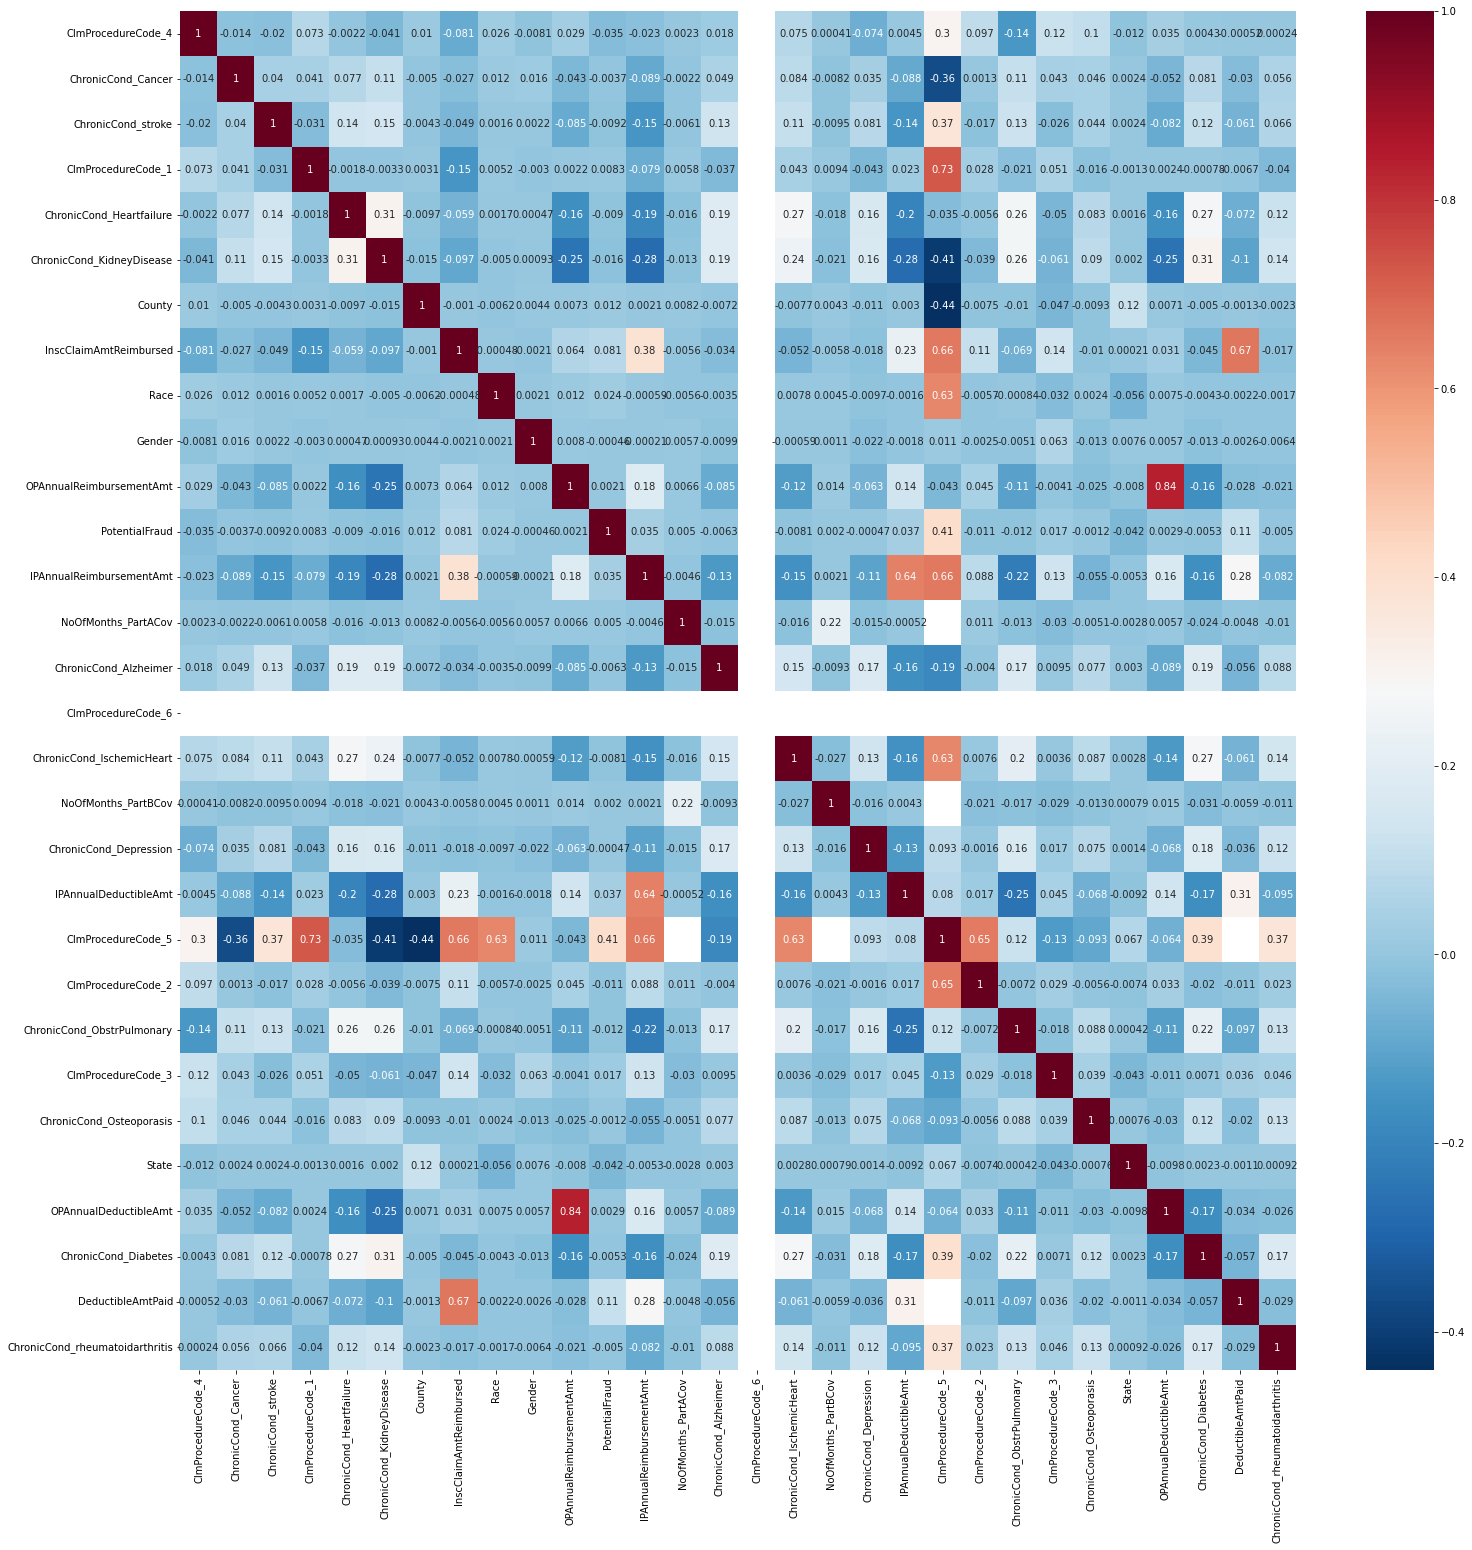

In [43]:
import seaborn as sb

fig = plt.figure(figsize=(25,25))
sb.heatmap(pearsoncorr_num, 
            xticklabels=pearsoncorr_num.columns,
            yticklabels=pearsoncorr_num.columns,
            cmap='RdBu_r',
            annot=True)

In [44]:
df_num.agg(['size','count','nunique','min','max']).T

,size,count,nunique,min,max
BeneID,558211,558211,138556,0,138555
ClaimID,558211,558211,558211,0,558210
ClaimStartDt,558211,558211,398,2008-11-27 00:00:00,2009-12-31 00:00:00
ClaimEndDt,558211,558211,366,2008-12-28 00:00:00,2009-12-31 00:00:00
Provider,558211,558211,5410,0,5409
InscClaimAmtReimbursed,558211,558211,438,0,125000
AttendingPhysician,558211,558211,82064,0,82063
OperatingPhysician,558211,558211,35316,0,35315
OtherPhysician,558211,558211,46458,0,46457
AdmissionDt,558211,558211,399,0,398


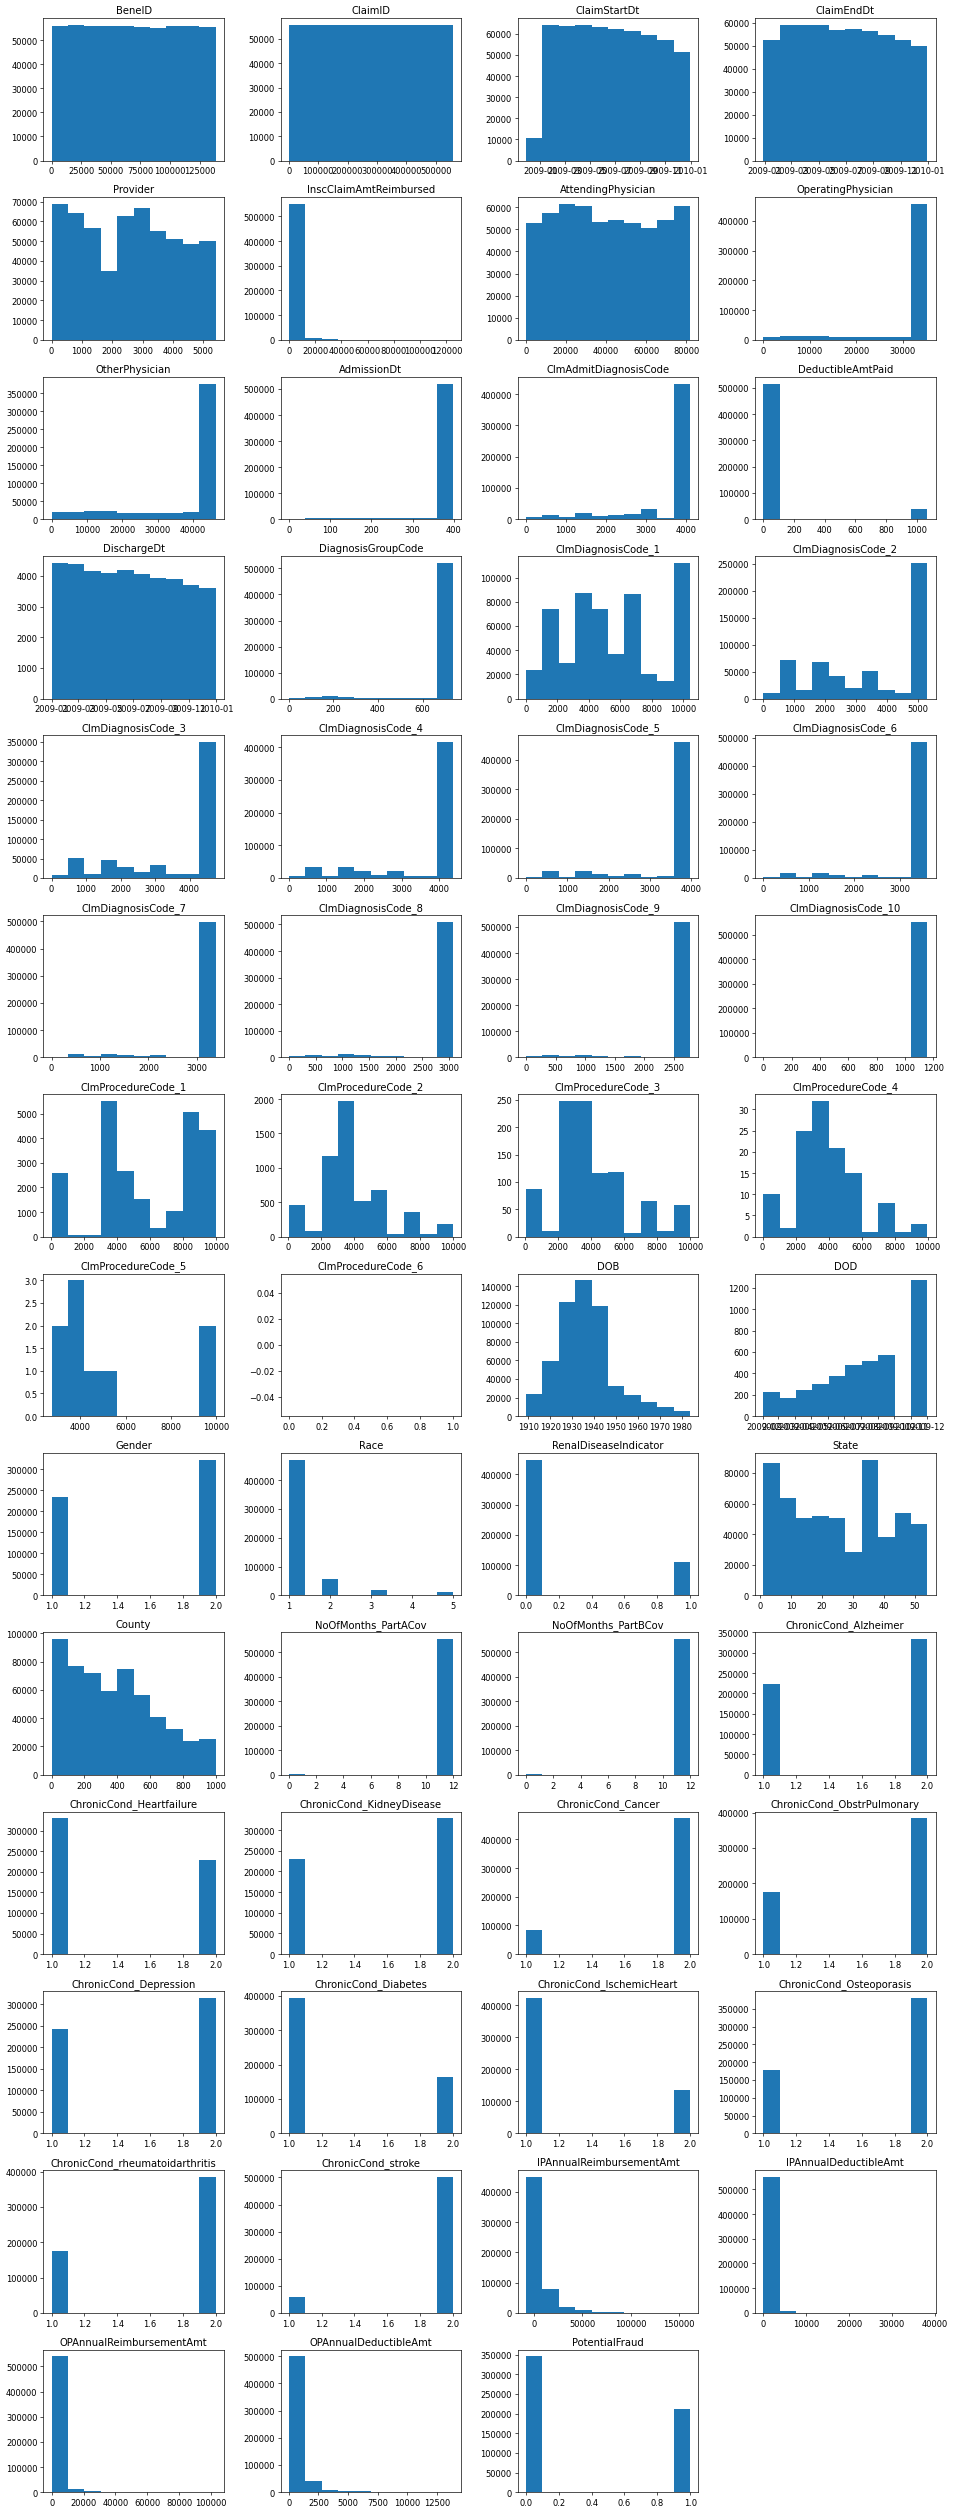

In [45]:
# Distribution

fig = plt.figure(figsize=(16,42),dpi=60)

for i in range(len(df_num.columns)):
# for i in range(len(df_num[num_col_list].columns)):
    plt.subplot(14,4,i+1)
    plt.hist(df_num.iloc[:,i:i+1].dropna().values)
    plt.title(df_num.columns[i])
plt.tight_layout()
plt.show()

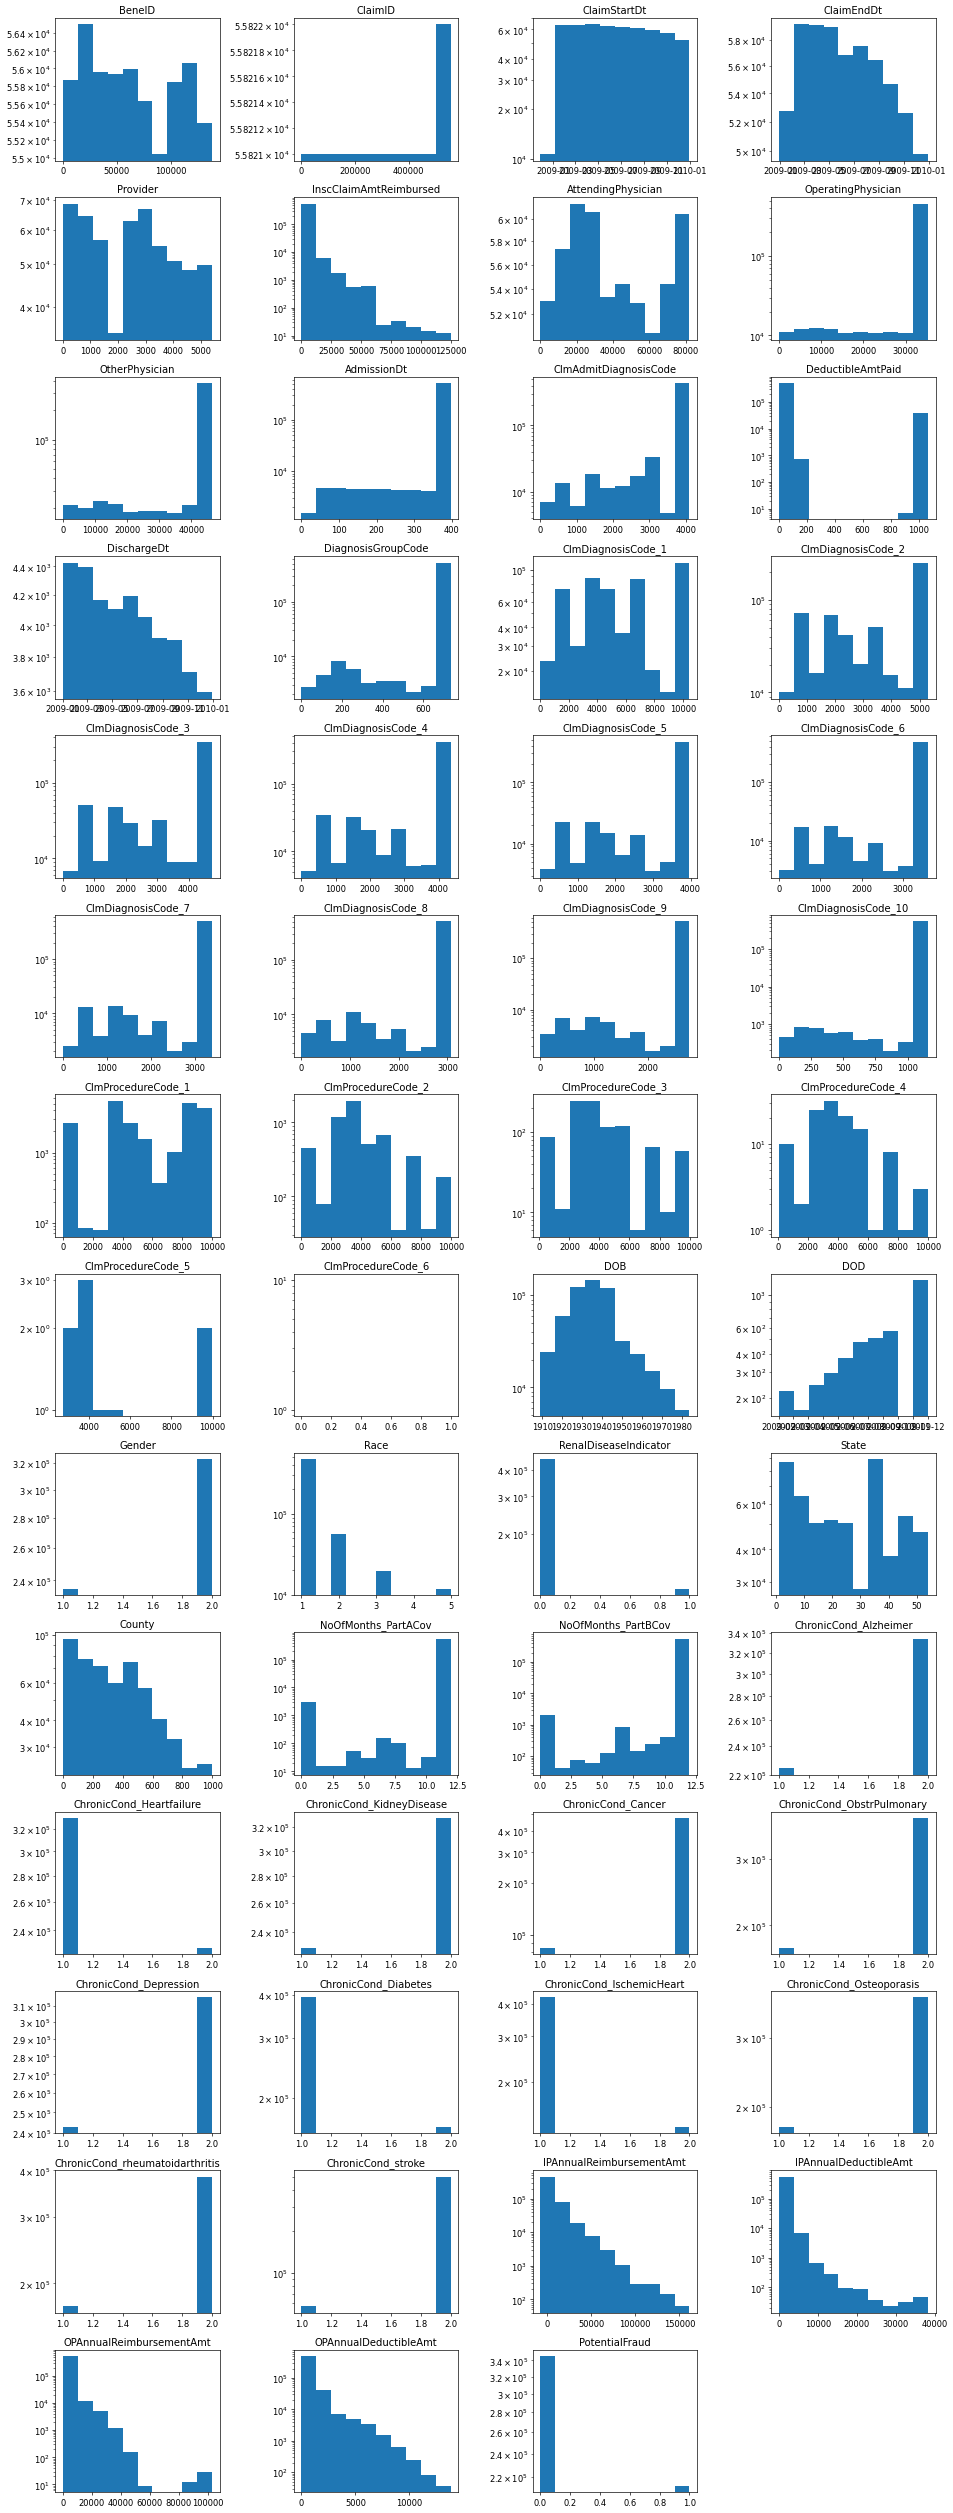

In [46]:
# log y distribution

fig = plt.figure(figsize=(16,42),dpi=60)

for i in range(len(df_num.columns)):
# for i in range(len(df_num[num_col_list].columns)):
    plt.subplot(14,4,i+1)
    plt.hist(df_num.iloc[:,i:i+1].dropna().values)
    plt.yscale('log')
    plt.title(df_num.columns[i])
plt.tight_layout()
plt.show()

#### Modeling_aggregate on provider

In [ ]:
# from sklearn.model_selection import train_test_split
# append train and test
# X = X_train_raw.append(X_test_raw, ignore_index=True)
# y = y_train_raw.append(y_test_raw, ignore_index=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

In [47]:
# Import Data
X_train= pd.read_csv('/Users/cuicuisong/Desktop/data/X_train_aggregated.csv',  index_col=0)
X_test= pd.read_csv('/Users/cuicuisong/Desktop/data/X_test_aggregated.csv',  index_col=0)
y_train= pd.read_csv('/Users/cuicuisong/Desktop/data/y_train_agg.csv')
y_test= pd.read_csv('/Users/cuicuisong/Desktop/data//y_test_agg.csv')

In [4]:
X_train.head()

,DeductibleAmtPaid_mean,DeductibleAmtPaid_max,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,OPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,OPAnnualDeductibleAmt_max,OPAnnualDeductibleAmt_sum,...,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac
Provider,,,,,,,,,,,,,,,,,,,,,
PRV53960,2.452381,200.0,12.000000,12.000000,3279.214286,43330,1377270,902.166667,9180,378910,...,0.480952,0.085714,0.242857,0.426190,0.719048,0.773810,0.357143,0.316667,0.040476,0.016667
PRV52517,3.750000,70.0,11.625000,12.000000,2082.500000,6110,66640,537.500000,1530,17200,...,0.375000,0.187500,0.281250,0.343750,0.593750,0.781250,0.218750,0.625000,0.062500,0.000000
PRV55652,1.785714,50.0,12.000000,12.000000,1757.500000,9840,49210,500.357143,3110,14010,...,0.178571,0.107143,0.285714,0.535714,0.714286,0.785714,0.392857,0.321429,0.071429,0.000000
PRV57328,4.473684,70.0,12.000000,12.000000,1498.157895,7400,56930,465.789474,1550,17700,...,0.342105,0.105263,0.236842,0.394737,0.500000,0.631579,0.342105,0.263158,0.078947,0.052632
PRV56721,4.059406,100.0,11.915842,11.881188,2032.673267,24260,410600,599.900990,6300,121180,...,0.430693,0.158416,0.356436,0.485149,0.643564,0.722772,0.321782,0.232673,0.084158,0.000000


In [3]:
y_train.head()

,PotentialFraud
0,0
1,0
2,0
3,0
4,0


In [5]:
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4328, 54)

(1082, 54)

(4328, 1)

(1082, 1)

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4328 entries, PRV53960 to PRV52602
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DeductibleAmtPaid_mean            4328 non-null   float64
 1   DeductibleAmtPaid_max             4328 non-null   float64
 2   NoOfMonths_PartACov_mean          4328 non-null   float64
 3   NoOfMonths_PartBCov_mean          4328 non-null   float64
 4   OPAnnualReimbursementAmt_mean     4328 non-null   float64
 5   OPAnnualReimbursementAmt_max      4328 non-null   int64  
 6   OPAnnualReimbursementAmt_sum      4328 non-null   int64  
 7   OPAnnualDeductibleAmt_mean        4328 non-null   float64
 8   OPAnnualDeductibleAmt_max         4328 non-null   int64  
 9   OPAnnualDeductibleAmt_sum         4328 non-null   int64  
 10  ClaimCounts                       4328 non-null   int64  
 11  Gender                            4328 non-null   float64
 12  

In [7]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4328 entries, 0 to 4327
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   PotentialFraud  4328 non-null   int64
dtypes: int64(1)
memory usage: 33.9 KB


In [49]:
# Train and test data
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#### I. Baseline Model¶

In [50]:
# use standradscaler and LogisticRegression to build a classification pipeline.
steps = [('rescale',StandardScaler()),
         ('logr', LogisticRegression())]
model = Pipeline(steps)
model = model.fit(X_train, y_train)

In [51]:
# Predicting: Use the predict function of the model to make predictions for the training set and test set
y_train_pred = model.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
# fill NA as 0, X_test has two null values
X_test.fillna(0,inplace=True)
y_test_pred = model.predict(X_test)
y_test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3925
           1       0.76      0.55      0.64       403

    accuracy                           0.94      4328
   macro avg       0.86      0.77      0.80      4328
weighted avg       0.94      0.94      0.94      4328

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       979
           1       0.75      0.57      0.65       103

    accuracy                           0.94      1082
   macro avg       0.85      0.78      0.81      1082
weighted avg       0.94      0.94      0.94      1082



In [54]:
# Get the confusion matrix
print(confusion_matrix(y_train, y_train_pred))
print("-------------")
print(confusion_matrix(y_test, y_test_pred))

[[3854   71]
 [ 180  223]]
-------------
[[959  20]
 [ 44  59]]


In [55]:
# 1.3 Feature Importance

In [56]:
# calculate the feature score
# model[1]: logisticregression
importance = model[1].coef_[0]        
for i,j in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,j))

Feature: 0, Score: 0.44708
Feature: 1, Score: -0.18934
Feature: 2, Score: 0.10687
Feature: 3, Score: -0.08749
Feature: 4, Score: 0.06220
Feature: 5, Score: -0.05877
Feature: 6, Score: 0.54243
Feature: 7, Score: -0.20867
Feature: 8, Score: 0.04186
Feature: 9, Score: 0.49961
Feature: 10, Score: 0.97208
Feature: 11, Score: 0.02045
Feature: 12, Score: 0.03489
Feature: 13, Score: 0.13070
Feature: 14, Score: -0.37028
Feature: 15, Score: 0.15336
Feature: 16, Score: -0.07001
Feature: 17, Score: -0.69974
Feature: 18, Score: 0.41769
Feature: 19, Score: 0.64988
Feature: 20, Score: 0.20081
Feature: 21, Score: 0.30807
Feature: 22, Score: -0.22073
Feature: 23, Score: -0.26804
Feature: 24, Score: -0.17806
Feature: 25, Score: 0.44383
Feature: 26, Score: 0.29628
Feature: 27, Score: -0.09811
Feature: 28, Score: 0.20931
Feature: 29, Score: -0.00199
Feature: 30, Score: 0.25881
Feature: 31, Score: 0.15612
Feature: 32, Score: -0.05941
Feature: 33, Score: -0.14641
Feature: 34, Score: -0.08232
Feature: 35, Sc

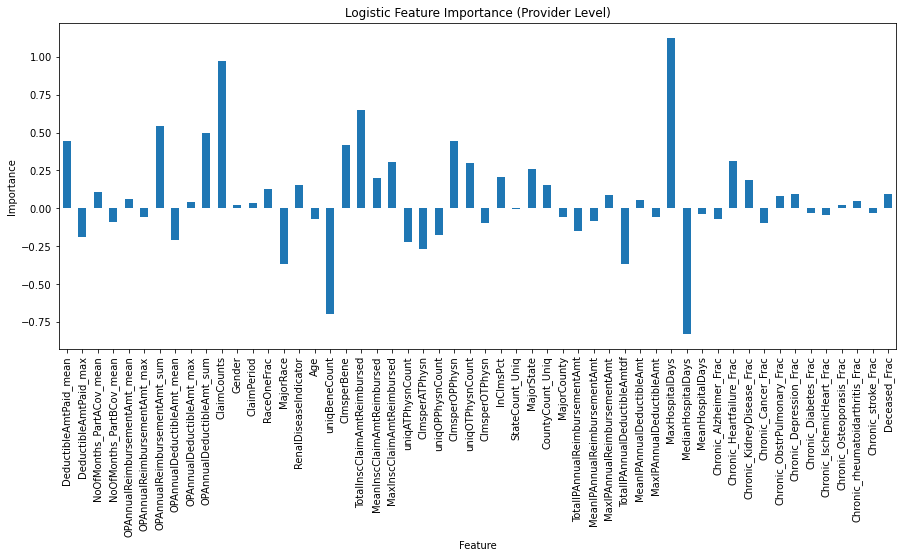

In [57]:
# plot feature importance
feature_names = X_train.columns
feature_importance = (pd.Series(importance, index = feature_names))
plt.figure(figsize=(15,6))
feature_importance.plot.bar()
plt.title('Logistic Feature Importance (Provider Level)')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

#### II. Prediction with balanced class weights

In [ ]:
# 2.1 Set class_weight in Logistic Regression and retrain the model.

In [58]:
steps = [('rescale', StandardScaler()),
         ('logr', LogisticRegression(class_weight = 'balanced'))]
model_balanced = Pipeline(steps)
model_balanced = model_balanced.fit(X_train, y_train)

In [59]:
y_train_pred_balanced = model_balanced.predict(X_train)
y_test_pred_balanced = model_balanced.predict(X_test)

In [60]:
y_test_pred_balanced

array([1, 0, 0, ..., 0, 0, 0])

In [61]:
# Re-calcualte all the above metrics and confusion matrix.
print(classification_report(y_train, y_train_pred_balanced))
print(classification_report(y_test, y_test_pred_balanced))

# notes: a little smaller than non-balanced model

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3925
           1       0.47      0.92      0.62       403

    accuracy                           0.90      4328
   macro avg       0.73      0.91      0.78      4328
weighted avg       0.94      0.90      0.91      4328

              precision    recall  f1-score   support

           0       0.99      0.89      0.93       979
           1       0.45      0.87      0.59       103

    accuracy                           0.89      1082
   macro avg       0.72      0.88      0.76      1082
weighted avg       0.93      0.89      0.90      1082



In [62]:
print(confusion_matrix(y_train, y_train_pred_balanced))
print("-------------")
print(confusion_matrix(y_test, y_test_pred_balanced))

[[3514  411]
 [  33  370]]
-------------
[[868 111]
 [ 13  90]]


#### III. Use the predict_proba function of the model to make predictions for the training and testing sets

In [63]:
y_train_proba = model_balanced.predict_proba(X_train)
y_test_proba = model_balanced.predict_proba(X_test)

In [64]:
y_train_proba.shape

(4328, 2)

In [65]:
y_test_proba.shape

(1082, 2)

In [66]:
y_test_proba

array([[0.02243471, 0.97756529],
       [0.95491143, 0.04508857],
       [0.83579465, 0.16420535],
       ...,
       [0.84387635, 0.15612365],
       [0.96548158, 0.03451842],
       [0.99241722, 0.00758278]])

In [67]:
# What is the range of the values in y_train_proba and y_test_proba? What do the values mean?
print('The range of y_train_proba is: (', np.min(y_train_proba[:,1]), ',', np.max(y_train_proba[:,1]), ')')
print('The range of y_train_proba is: (', np.min(y_test_proba[:,1]), ',', np.max(y_test_proba[:,1]), ')')

The range of y_train_proba is: ( 4.374813908997503e-09 , 1.0 )
The range of y_train_proba is: ( 9.312143955323934e-09 , 0.9999999395333811 )


In [ ]:
# 3.2 Threshold

Text(0.5, 1.0, 'Precision, Recall, and f1 Score versus Threshold')

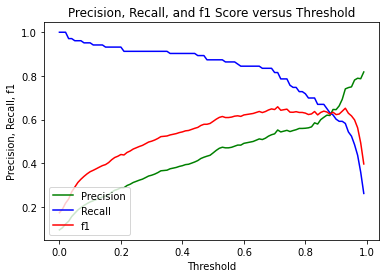

In [73]:
# Cuicui
thresholds = np.arange(0, 1.0, 0.01)
precision_lst=[]
recall_lst=[]
f1_lst = []
for i in thresholds:
    y_test_prednew1= (y_test_proba[:, 1]>= i).astype(int)
    precision_lst.append(precision_score(y_test, y_test_prednew1))
    recall_lst.append(recall_score(y_test, y_test_prednew1))
    f1_lst.append(f1_score(y_test, y_test_prednew1))
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision_lst, "g-", label="Precision")
plt.plot(thresholds, recall_lst, "b-", label="Recall")
plt.plot(thresholds, f1_lst, "r-", label="f1")
plt.ylabel("Precision, Recall, f1")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.title('Precision, Recall, and f1 Score versus Threshold')

In [ ]:
# 3.3 ROC AUC

In [78]:
# Calculate the train and test roc_auc_scores.
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_train_proba[:, 1]),\
roc_auc_score(y_test, y_test_proba[:, 1])

(0.9577809739058968, 0.931304977339667)

In [79]:
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_proba[:, 1])

Text(0, 0.5, 'true positive rate')

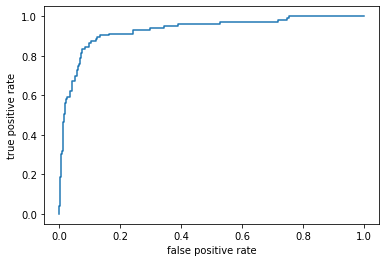

In [80]:
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
# The x axes is the false positive rate (recall or sensitivity) and the y axes is the true positive rate.

#### Random Forest

In [81]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

steps = [('rfc', RandomForestClassifier(n_estimators = 3, criterion = 'entropy', 
                                        random_state = 0,class_weight='balanced',
                                        min_samples_split=50,oob_score=True,
                                        max_features='log2',max_depth=50))]
model = Pipeline(steps)
model = model.fit(X_train,y_train)  #criterion = 'gini'

In [83]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [85]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
y_test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [87]:
# Feature Importance

feat_labels = X_train.columns
importances = model.steps[0][1].feature_importances_
indices = np.argsort(importances)[::-1]
res=[]
for f in range(X_train.shape[1]):
    #print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    res.append([feat_labels[indices[f]], importances[indices[f]]])
df_importances=pd.DataFrame(res)
threshold = 0.055
list(df_importances[df_importances[1]>threshold ][0])# feature importance > threshold 

['MaxHospitalDays',
 'TotalIPAnnualReimbursementAmt',
 'TotalInscClaimAmtReimbursed',
 'ClaimCounts',
 'TotalIPAnnualDeductibleAmtdf']

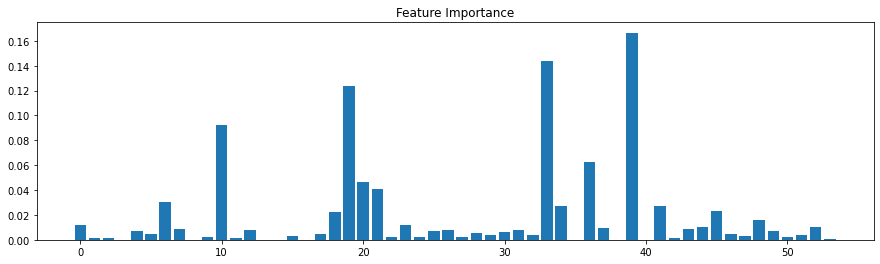

In [88]:
# plot feature importance
plt.figure(figsize=(15,4))
plt.bar([x for x in range(len(importances))], importances)
plt.title('Feature Importance')

plt.show()

In [89]:
confusion_matrix(y_test, y_test_pred)

array([[881,  98],
       [ 17,  86]])

In [90]:
from sklearn.metrics import classification_report
print('---------------------Train Classification Report--------------------------------')
print(classification_report(y_train, y_train_pred))
print('---------------------Test Classification Report--------------------------------')
print(classification_report(y_test, y_test_pred))

---------------------Train Classification Report--------------------------------
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      3925
           1       0.54      0.93      0.68       403

    accuracy                           0.92      4328
   macro avg       0.76      0.92      0.82      4328
weighted avg       0.95      0.92      0.93      4328

---------------------Test Classification Report--------------------------------
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       979
           1       0.47      0.83      0.60       103

    accuracy                           0.89      1082
   macro avg       0.72      0.87      0.77      1082
weighted avg       0.93      0.89      0.91      1082



In [91]:
from sklearn.metrics import roc_auc_score
roc_auc_score_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])  
roc_auc_score_test  = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print('roc_auc_score for the train dataset: {:.2f}'.format(roc_auc_score_train))
print('roc_auc_score for the test dataset: {:.2f}'.format(roc_auc_score_test))

roc_auc_score for the train dataset: 0.98
roc_auc_score for the test dataset: 0.93


Text(0.5, 1.0, 'Test ROC Curve')

<Figure size 432x288 with 0 Axes>

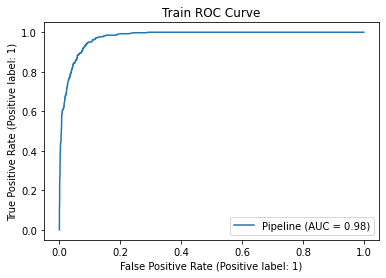

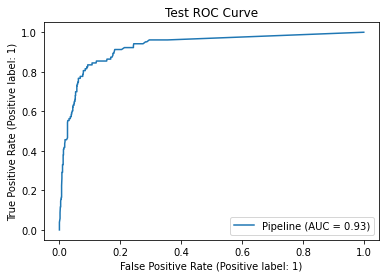

In [92]:
from sklearn.metrics import plot_roc_curve 

plt.figure(1).clf()

plot_roc_curve(model, X_train, y_train)

plt.title('Train ROC Curve')
plot_roc_curve(model, X_test, y_test)

plt.title('Test ROC Curve')

In [93]:
y_test_proba = model.predict_proba(X_test)
y_score = y_test_proba[:, 1]

PR-AUC is 0.63


Text(0.5, 1.0, 'Precision-Recall Curve')

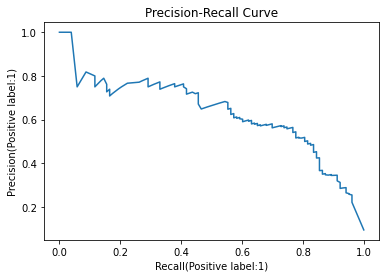

In [94]:
from sklearn.metrics import precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

from sklearn.metrics import auc,plot_precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print('PR-AUC is {:.2f}'.format(auc_precision_recall))

# plot PR curve
plt.plot(recall, precision)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve')

#### Claim_level Analysis

In [95]:
# Assign inpatient data as 1, outpatient data as 0
Healthcare_Inpatient_raw['In_Out']=1
Healthcare_Outpatient_raw['In_Out']=0


In [96]:
merge_provider_df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,1,2,2,2,21260,2136,120,100,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,...,1,2,2,1,2,0,0,5470,1870,No
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,...,1,2,2,1,2,0,0,5470,1870,No
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,...,1,2,2,1,2,0,0,5470,1870,No
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,1,2,2,1,2,0,0,5470,1870,No


In [ ]:
# Basic Transformer

In [ ]:
# Import modules for feature engineering and modelling
from sklearn.model_selection import train_test_split  # not used here, split based on provider
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve  


from sklearn.metrics import precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

from sklearn.metrics import auc,plot_precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

from sklearn.metrics import roc_curve,auc,RocCurveDisplay

# Set seed for reproducibility
seed1, seed2, seed3=101,67, 42

In [97]:
# seperate columns into target, num, datetime, categorical
target=['PotentialFraud']
colnames=merge_provider_df.columns.to_list()
num_col_list=(merge_provider_df.describe()).columns.tolist()
datetime_col_list=['ClaimStartDt','ClaimEndDt','DischargeDt','DOB','DOD']
cat_col_list=list(set(colnames)-set(num_col_list)-set(target)-set(datetime_col_list))

In [98]:
# get a copy of the merged data, prepare change all to numerical
df_num=merge_provider_df.copy(deep=True)

# change date column datatype to datetime

for datetime_col_name in datetime_col_list:
    df_num[datetime_col_name]=pd.to_datetime(df_num[datetime_col_name])

    
# label encode all object columns

le=LabelEncoder()

for cat_col_name in cat_col_list:
    df_num[cat_col_name]=le.fit_transform(df_num[cat_col_name])

    
# transform target to binary code

df_num['PotentialFraud']=df_num['PotentialFraud'].map(lambda x:1 if (x=='Yes' or x==1) else 0)

df_num.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,9381,299052,2009-04-12,2009-04-18,3928,26000,53275,35315,46457,134,...,1,1,2,1,1,36000,3204,60,70,1
1,9381,471344,2009-08-31,2009-09-02,3923,5000,4951,2132,46457,275,...,1,1,2,1,1,36000,3204,60,70,0
2,9381,491764,2009-09-17,2009-09-20,4034,5000,40843,35315,5201,292,...,1,1,2,1,1,36000,3204,60,70,0
3,9489,226452,2009-02-14,2009-02-22,1125,5000,39020,23575,14717,77,...,1,2,2,1,1,5000,1068,250,320,0
4,9518,450337,2009-08-13,2009-08-30,4490,10000,45475,25118,46457,257,...,2,1,2,2,2,21260,2136,120,100,0


In [99]:
# calculte claimPeriod and HospitalizedDays
# df_num = merge_provider_df.copy(deep=True)
df_num['ClaimPeriod'] = (pd.to_datetime(df_num.ClaimEndDt) - pd.to_datetime(df_num.ClaimStartDt)).dt.days + 1
df_num['HospitalizedDays'] = (pd.to_datetime(df_num.DischargeDt) - pd.to_datetime(df_num.AdmissionDt)).dt.days + 1
# make hospitallized day 0 for outpatient
df_num['HospitalizedDays'] = df_num['HospitalizedDays'].apply(lambda x : 0 if pd.isna(x) else x )

In [100]:
#calculate age and determine if a person is deceased. If the person is still alive, 
#use '2009-12-01' as the time we calculate age

from datetime import date, datetime
def calulateAge(dob, dod, calulationDate):
    born = dob
    if not pd.isna(dod):
        calulationDate = dod
    else:
        calulationDate = datetime.strptime(calulationDate, "%Y-%m-%d").date()
    return calulationDate.year - born.year - ((calulationDate.month, calulationDate.day) < (born.month, born.day))    


df_num['Deceased'] = df_num['DOD'].apply(lambda x : 0 if pd.isna(x) else 1) 
df_num['Age'] = df_num.apply(lambda x: calulateAge(dob = x['DOB'], dod = x['DOD'], calulationDate = '2009-12-01'), axis = 1)

In [101]:
'''columns: list of columns ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2']'''
def countCodeNumbers(df, columns):
    df_codes = df_num.loc[:, columns]
    codecount = df_codes.notnull().sum(axis=1)
    return codecount

diagnosis_code_columns = [x for x in list(df_num.columns) if 'ClmDiag' in x]
procedure_code_columns = [x for x in list(df_num.columns) if 'ClmProc' in x]

df_num['DiagnosisCodeCount'] = countCodeNumbers(df_num, diagnosis_code_columns)
df_num['ProcedureCodeCount'] = countCodeNumbers(df_num, procedure_code_columns)

In [102]:
df_num['DiagnosisGroupCode'] = df_num['DiagnosisGroupCode'].apply(lambda x: -999 if pd.isna(x) else x)

In [103]:
col_names_all=list(df_num.columns)
col_names_all.remove('Provider')  # remove does not have a return value (inplace=True)
col_names_all.remove('PotentialFraud')  # remove does not have a return value (inplace=True)
col_names_all.insert(0,'Provider')
col_names_all.insert(0,'PotentialFraud')
col_names_all
df_num_reorder=df_num[col_names_all].copy(deep=True)
df_num_reorder.fillna(-1,inplace=True)
df_num_reorder

,PotentialFraud,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimPeriod,HospitalizedDays,Deceased,Age,DiagnosisCodeCount,ProcedureCodeCount
0,1,3928,9381,299052,2009-04-12,2009-04-18,26000,53275,35315,46457,...,36000,3204,60,70,7,14352.0,0,66,10,0
1,0,3923,9381,471344,2009-08-31,2009-09-02,5000,4951,2132,46457,...,36000,3204,60,70,3,14489.0,0,66,10,1
2,0,4034,9381,491764,2009-09-17,2009-09-20,5000,40843,35315,5201,...,36000,3204,60,70,4,14507.0,0,66,10,0
3,0,1125,9489,226452,2009-02-14,2009-02-22,5000,39020,23575,14717,...,5000,1068,250,320,9,14297.0,0,95,10,1
4,0,4490,9518,450337,2009-08-13,2009-08-30,10000,45475,25118,46457,...,21260,2136,120,100,18,14486.0,0,71,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,0,2169,60012,338509,2009-08-06,2009-08-06,800,35429,15357,28322,...,0,0,5470,1870,1,0.0,0,57,10,0
558207,0,2172,60012,374404,2009-08-29,2009-08-29,400,74595,6177,46457,...,0,0,5470,1870,1,0.0,0,57,10,0
558208,0,2149,60012,414381,2009-09-24,2009-09-24,60,33358,35315,46457,...,0,0,5470,1870,1,0.0,0,57,10,0
558209,0,2161,60012,450432,2009-10-18,2009-10-18,70,61401,35315,41005,...,0,0,5470,1870,1,0.0,0,57,10,0


In [105]:
df_num_reorder['Provider_label']=merge_provider_df.Provider.copy(deep=True)


In [ ]:
rf_steps = [('rescale', StandardScaler()), 
            ('rfc', RandomForestClassifier(n_estimators = 5, criterion = 'entropy', 
                                        random_state = seed1,class_weight='balanced'))]
rf_model = Pipeline(rf_steps)
rf_model = rf_model.fit(X_train,y_train)  #criterion = 'gini'

In [ ]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [ ]:
print('Training Accuracy Score: {0:.3f}'.format(accuracy_score(y_train, y_train_pred)))
print('Testinging Accuracy Score: {0:.3f}'.format(accuracy_score(y_test, y_test_pred)))